# Part 1: Examine changes in portfolio mix

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

## Read original montly dataset into Python 

In [2]:
column_names=['fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
              'occpy_sts', 'cltv', 'dti', 'oyrig_upb', 'ltv', 'int_rt', 'channel', 'ppmt_pnlty',
              'prod_type', 'st', 'prop_type', 'zipcode', 'id_loan', 'loan_purpose',
              'orig_loan_term', 'cnt_borr', 'seller_name', 'servicer_name', 'flag_sc', 'pre_h']

sample_pct=0.01

import os 
destine=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/historical_data1_Q")


def read_modfile(y, q): # define something
    file=pd.read_csv(destine+str(q)+str(y)+'.txt', sep="|", names=column_names, header=None, low_memory=False) 
    return file[(np.random.uniform(0, 1, len(file['id_loan'])) < sample_pct)
                & (file['fico'] >= 550) 
                & (file['fico'] <= 850) 
                & (file['prop_type']=='SF')
                & (file['orig_loan_term']==360)].assign(quarter=str(y)+'Q'+str(q)) # assign a new column using the method function

# np.random.uniform(): Draw samples from a uniform distribution.
# orig_loan_term: A calculation of the number of scheduled monthly payments of the mortgage based on the First Payment Date and Maturity Date.
# Calculation: (Loan Maturity Date (MM/YY) – Loan First Payment Date (MM/YY))
# 30-year fixed rate(30 Year Mortgage): A loan amortized over 360 months with an interest rate that will remain the same for the life of the loan.
# low_memory = False: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options/24251426



modfile_2008Q1=read_modfile(2008, 1)
modfile_2008Q2=read_modfile(2008, 2)
modfile_2008Q3=read_modfile(2008, 3)
modfile_2008Q4=read_modfile(2008, 4)

modfile_2009Q1=read_modfile(2009, 1)
modfile_2009Q2=read_modfile(2009, 2)
modfile_2009Q3=read_modfile(2009, 3)
modfile_2009Q4=read_modfile(2009, 4)

In [3]:
# combine all the quater dataset (combine dataframe using pd.concat)
model_file=pd.concat([modfile_2008Q1, modfile_2008Q2, modfile_2008Q3, modfile_2008Q4,
                      modfile_2009Q1, modfile_2009Q2, modfile_2009Q3, modfile_2009Q4])

## Hypothesis 1

In [4]:
#calculate the mean before and after financial meltdown  (group by the 'quater' first then 'fico_band', then add the mean after)
model_df = model_file.groupby(['quarter']).mean()['fico']
model_df

quarter
2008Q1    729.546028
2008Q2    737.259813
2008Q3    738.747899
2008Q4    743.931464
2009Q1    759.741194
2009Q2    762.840120
2009Q3    757.078565
2009Q4    755.958110
Name: fico, dtype: float64

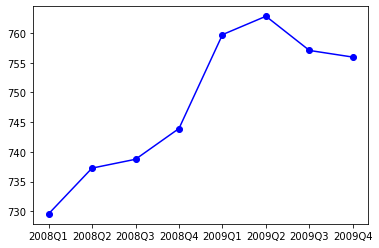

In [5]:
# viz:
import matplotlib.pyplot as plt

plt.plot(model_df,'bo-') #to build a line plot
    
plt.show() # to show the line plot

## Hypothesis 2

In [6]:
# define FICO bands
# FICO < 660 is considered subprime
def fico_band(fico):
    if fico < 660: 
        return 'Subprime fico'
    else:
        return 'Prime fico'

In [7]:
# add a new column ('fico_band') to the model_file then apply the FICO band function to each row
model_file['fico_band']=model_file['fico'].apply(fico_band)

# for more info about .apply(), visit: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [8]:
model_file

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,pre_h,quarter,fico_band
185,726,200803,N,203802,NaN,0,1,P,27,26,...,F108Q1000189,C,360,2,Other sellers,Other servicers,NaN,NaN,2008Q1,Prime fico
229,790,200803,Y,203802,17140.0,0,1,P,80,20,...,F108Q1000233,P,360,2,Other sellers,USBANKNA,NaN,NaN,2008Q1,Prime fico
249,706,200804,9,203803,28740.0,0,1,P,58,47,...,F108Q1000254,C,360,1,Other sellers,Other servicers,NaN,NaN,2008Q1,Prime fico
307,610,200803,N,203802,40420.0,0,1,P,80,19,...,F108Q1000314,C,360,2,Other sellers,Other servicers,NaN,NaN,2008Q1,Subprime fico
333,725,200803,Y,203802,NaN,30,1,P,95,28,...,F108Q1000340,P,360,2,Other sellers,USBANKNA,NaN,NaN,2008Q1,Prime fico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350048,668,200912,Y,203911,35004.0,0,1,P,50,20,...,F109Q4353017,P,360,2,Other sellers,Other servicers,NaN,NaN,2009Q4,Prime fico
350453,755,200912,Y,203911,28940.0,0,1,P,100,43,...,F109Q4382239,P,360,1,BRANCHBANKING&TRUSTC,Other servicers,NaN,NaN,2009Q4,Prime fico
350575,685,200912,Y,203911,16740.0,0,1,P,97,24,...,F109Q4382361,P,360,1,Other sellers,Other servicers,NaN,NaN,2009Q4,Prime fico
350626,738,201001,N,203912,39580.0,0,1,P,100,28,...,F109Q4382412,P,360,1,Other sellers,Other servicers,NaN,NaN,2009Q4,Prime fico


In [9]:
model_file.groupby(['quarter','fico_band'])['fico'].size().groupby('quarter').apply(lambda x:100*x/x.sum())

quarter  fico_band    
2008Q1   Prime fico       87.894073
         Subprime fico    12.105927
2008Q2   Prime fico       92.383178
         Subprime fico     7.616822
2008Q3   Prime fico       92.436975
         Subprime fico     7.563025
2008Q4   Prime fico       93.535826
         Subprime fico     6.464174
2009Q1   Prime fico       97.816594
         Subprime fico     2.183406
2009Q2   Prime fico       98.606177
         Subprime fico     1.393823
2009Q3   Prime fico       97.769156
         Subprime fico     2.230844
2009Q4   Prime fico       97.798067
         Subprime fico     2.201933
Name: fico, dtype: float64

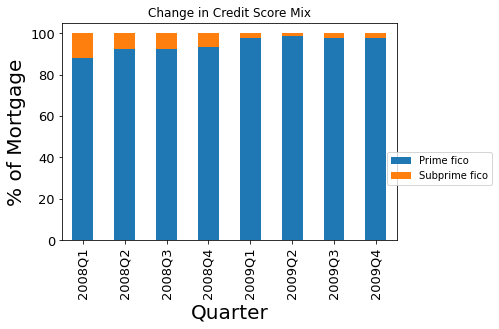

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

model_file.groupby(['quarter', 'fico_band'])['fico'].size().groupby(level=0).apply(lambda x:100*x/x.sum()). \
unstack().plot(kind='bar', stacked=True, title='Change in Credit Score Mix', fontsize=13)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('% of Mortgage', fontsize=20)
# plt.gca().yaxis.set_major_formatter(plt.FunFormatter(format_fun))
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 0.3), loc=8, bbox_transform=plt.gcf().transFigure)
plt.show()

## Hypothesis 3

In [12]:
#increased value of the houses in a few years, so portion of purchases (i.e., buying a
#house rather than refinancing an existing mortgage) was higher. After the meltdown, portions of purchases went down. 
#Lower interest rates in 2009 also boosted the market for refinancing.

In [13]:
def loan_purpose_ct(loan_purpose):
    
    if loan_purpose == 'P':
        return 'Purchase'
    elif loan_purpose == 'C':
        return 'Refinance - Cash Out'
    elif loan_purpose == 'N':
        return 'Refinance - No Cash Out'
    elif loan_purpose == 'R':
        return 'Refinance - Not Specified'
    elif loan_purpose == 9:
        return 'Not Available'

In [14]:
# add a new column
model_file['loan_purpose_ct']=model_file['loan_purpose'].apply(loan_purpose_ct)

In [15]:
model_file.groupby(['quarter','loan_purpose_ct'])['loan_purpose'].size().groupby('quarter').apply(lambda x:100*x/x.sum())

quarter  loan_purpose_ct        
2008Q1   Purchase                   24.001681
         Refinance - Cash Out       41.698193
         Refinance - No Cash Out    34.300126
2008Q2   Purchase                   38.457944
         Refinance - Cash Out       37.710280
         Refinance - No Cash Out    23.831776
2008Q3   Purchase                   52.177235
         Refinance - Cash Out       28.571429
         Refinance - No Cash Out    19.251337
2008Q4   Purchase                   39.408100
         Refinance - Cash Out       29.205607
         Refinance - No Cash Out    31.386293
2009Q1   Purchase                   12.547307
         Refinance - Cash Out       32.227074
         Refinance - No Cash Out    55.225619
2009Q2   Purchase                   18.174365
         Refinance - Cash Out       32.221919
         Refinance - No Cash Out    49.603717
2009Q3   Purchase                   37.245393
         Refinance - Cash Out       32.347236
         Refinance - No Cash Out    30.407371
2

## Hypothesis 4

In [16]:
# i.e., their delinquency rate is much lower compared to those loans originated before the meltdown.

In [17]:
# read 2008Q1 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q12008.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201303]
    mylist.append(chunk)
    
perf_file_2008Q1=pd.concat(mylist, axis=0)

perf_file_2008Q1.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

perf_file_2008Q1

,id_loan,Period,Act_endg_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,CD_Zero_BAL,Dt_zero_BAL,...,misc_costs,actual_loss,modcost,stepmod_ind,mod_def_paym,ELTV,ZBRU,DAI,na1,na2
0,F108Q1000001,200802,272000.00,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F108Q1000001,200803,271000.00,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F108Q1000001,200804,271000.00,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F108Q1000001,200805,271000.00,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F108Q1000001,200806,270000.00,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21447324,F108Q1403100,201007,96930.46,0,27,333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21447325,F108Q1403100,201008,96809.16,0,28,332,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21447326,F108Q1403100,201009,96687.29,0,29,331,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21447327,F108Q1403100,201010,96564.85,0,30,330,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# read 2008Q2 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q22008.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201306]
    mylist.append(chunk)
    
perf_file_2008Q2=pd.concat(mylist, axis=0)
perf_file_2008Q2.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [19]:
# read 2008Q3 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q32008.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201309]
    mylist.append(chunk)
    
perf_file_2008Q3=pd.concat(mylist, axis=0)
perf_file_2008Q3.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [20]:
# read 2008Q4 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q42008.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201312]
    mylist.append(chunk)
    
perf_file_2008Q4=pd.concat(mylist, axis=0)
perf_file_2008Q4.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [21]:
# read 2009Q1 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q12009.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201403]
    mylist.append(chunk)
    
perf_file_2009Q1=pd.concat(mylist, axis=0)
perf_file_2009Q1.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [22]:
# read 2009Q2 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q22009.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201406]
    mylist.append(chunk)
    
perf_file_2009Q2=pd.concat(mylist, axis=0)
perf_file_2009Q2.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [23]:
# read 2009Q3 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q32009.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201409]
    mylist.append(chunk)
    
perf_file_2009Q3=pd.concat(mylist, axis=0)
perf_file_2009Q3.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [24]:
# read 2009Q4 data set

# define chunksize to ensure enough memory for reading in files, otherwise your computer will crash
c_size=1000

import os #use this to import a dataset from a Mac
destine_perf=os.path.expanduser("~/Desktop/Freddie_Mac_Project/Dataset/Performance_Data/historical_data1_time_Q42009.txt")

mylist=[]
for chunk in pd.read_csv(destine_perf, sep="|", header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=c_size):
    
    chunk=chunk[chunk[1] <= 201412]
    mylist.append(chunk)
    
perf_file_2009Q4=pd.concat(mylist, axis=0)
perf_file_2009Q4.columns = ['id_loan','Period','Act_endg_upb','delq_sts','loan_age','mths_remng','repch_flag',
                            'flag_mod','CD_Zero_BAL','Dt_zero_BAL','New_Int_rt','Amt_Non_Int_Brng_Upb','Dt_Lst_Pi',
                            'MI_Recoveries','Net_Sale_Proceed','Non_MI_Recoveries','Expenses','legal_costs',
                            'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss','modcost','stepmod_ind',
                            'mod_def_paym', 'ELTV', 'ZBRU','DAI','na1','na2']

In [25]:
join1 = pd.merge(modfile_2008Q1[['id_loan', 'int_rt', 'quarter']], perf_file_2008Q1, how='inner', on='id_loan')
join2 = pd.merge(modfile_2008Q2[['id_loan', 'int_rt', 'quarter']], perf_file_2008Q2, how='inner', on='id_loan')
join3 = pd.merge(modfile_2008Q3[['id_loan', 'int_rt', 'quarter']], perf_file_2008Q3, how='inner', on='id_loan')
join4 = pd.merge(modfile_2008Q1[['id_loan', 'int_rt', 'quarter']], perf_file_2008Q1, how='inner', on='id_loan')
join5 = pd.merge(modfile_2009Q1[['id_loan', 'int_rt', 'quarter']], perf_file_2009Q1, how='inner', on='id_loan')
join6 = pd.merge(modfile_2009Q2[['id_loan', 'int_rt', 'quarter']], perf_file_2009Q2, how='inner', on='id_loan')
join7 = pd.merge(modfile_2009Q3[['id_loan', 'int_rt', 'quarter']], perf_file_2009Q3, how='inner', on='id_loan')
join8 = pd.merge(modfile_2009Q4[['id_loan', 'int_rt', 'quarter']], perf_file_2009Q4, how='inner', on='id_loan')

In [26]:
orig_perf_combined = pd.concat([join1,join2,join3,join4,join5,join6,join7,join8])

In [27]:
# Bad 1:
# repossessed loans - Real estate owned (REO) Acquisition 
# delinquency 90+ days
# balance becomes zero, with delinquency flags 90+ days
# loan term modified

orig_perf_combined['delq_sts_num']=pd.to_numeric(orig_perf_combined['delq_sts'], errors='coerce')
orig_perf_combined.loc[(orig_perf_combined['delq_sts']=='R') | (orig_perf_combined['delq_sts_num'] > 2) |
                      (orig_perf_combined['CD_Zero_BAL'].isin(['3.0', '6.0', '9.0'])) |
                      (orig_perf_combined['flag_mod']=='Y'), 'bad1']=1


agg_loans1=orig_perf_combined.groupby(['id_loan'])[['bad1']].sum().reset_index()
agg_loans1

,id_loan,bad1
0,F108Q1000189,0.0
1,F108Q1000233,0.0
2,F108Q1000254,0.0
3,F108Q1000314,0.0
4,F108Q1000340,0.0
...,...,...
16819,F109Q4258990,0.0
16820,F109Q4259168,0.0
16821,F109Q4259211,0.0
16822,F109Q4259508,0.0


In [28]:
# bad 2:
# Recovery is usually associated with foreclosure and repossession.  Therefore, if a loan shows recoevery, it must
# have gone bad before. 
# MI: mortgate insurance

agg_loans2=orig_perf_combined.groupby(['id_loan'])['Non_MI_Recoveries', 
                                                   'MI_Recoveries', 'Amt_Non_Int_Brng_Upb'].max().reset_index()
agg_loans2.loc[(agg_loans2['Non_MI_Recoveries'] > 0) | (agg_loans2['MI_Recoveries'] > 0 ) | 
               (agg_loans2['Amt_Non_Int_Brng_Upb'] > 0), 'bad2']=1

<ipython-input-28-3247af593256>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_loans2=orig_perf_combined.groupby(['id_loan'])['Non_MI_Recoveries',


In [29]:
# Bad 3:
# If the loan has experienced a decrease in interest rate, the loan has been modified.
# A modified loan suggests the borrower has encountered financial hardship.

new_int_rt=orig_perf_combined.groupby('id_loan')[['New_Int_rt']].min().reset_index()
agg_loans3=pd.merge(model_file, new_int_rt, how='inner', on='id_loan')
agg_loans3.loc[agg_loans3['New_Int_rt'] < agg_loans3['int_rt'], 'bad3']=1

# while merging with model_file, the output already has all variables from origination

quarter
2008Q1    0.149706
2008Q2    0.101029
2008Q3    0.087920
2009Q1    0.024191
2009Q2    0.016133
2009Q3    0.021877
2009Q4    0.029650
Name: bad, dtype: float64


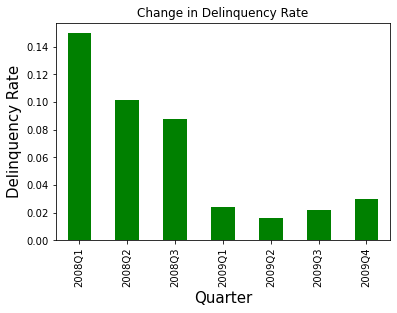

In [30]:
# combine bad 1, bad 2 & bad 3
bad_loans_all=pd.merge(agg_loans1, agg_loans2, how='outer', on='id_loan')
bad_loans_all=pd.merge(bad_loans_all, agg_loans3, how='outer', on='id_loan')
bad_loans_all['bad']=np.where((bad_loans_all['bad1'] > 0) | (bad_loans_all['bad2'] > 0) | 
                              (bad_loans_all['bad3'] > 0), 1, 0)

print(bad_loans_all['bad'].groupby(bad_loans_all['quarter']).mean())

# viz
bad_loans_all['bad'].groupby(bad_loans_all['quarter']).mean().plot(kind='bar', title='Change in Delinquency Rate',
                                                                  color='green')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Delinquency Rate', fontsize=15)
plt.show()